In [1]:
import pandas as pd
import numpy as np
import random as rnd
from matplotlib.pyplot import figure
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('C:/Users/dangnhh-ttcs/OneDrive - Cong Ty Co Phan Dau Tu Thanh Thanh Cong/Desktop/Python/DATA/titanic/train.csv')
test_df=pd.read_csv('C:/Users/dangnhh-ttcs/OneDrive - Cong Ty Co Phan Dau Tu Thanh Thanh Cong/Desktop/Python/DATA/titanic/test.csv')
combine=[train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending =False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


C:\Users\dangnhh-ttcs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


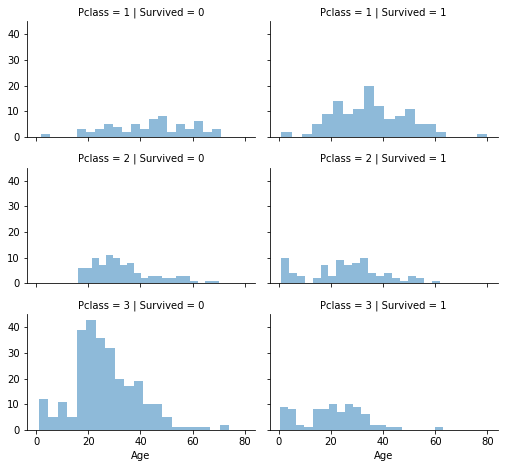

In [6]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

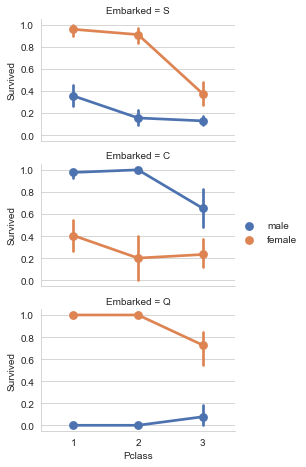

In [92]:
grid=sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette='deep')
grid.add_legend()

C:\Users\dangnhh-ttcs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dangnhh-ttcs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


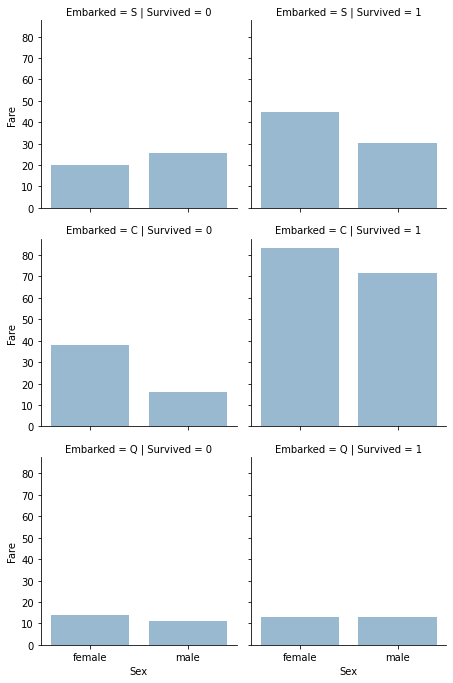

In [8]:
grid=sns.FacetGrid(train_df, row= 'Embarked', col='Survived',size= 3.2)
grid.map(sns.barplot,'Sex', 'Fare', alpha=0.5, ci=None)

In [9]:
train_df=train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df=test_df.drop(['Ticket', 'Cabin'], axis=1)
combine=[train_df, test_df]
combine.head()

AttributeError: 'list' object has no attribute 'head'

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('\S(\w)*\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

In [10]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

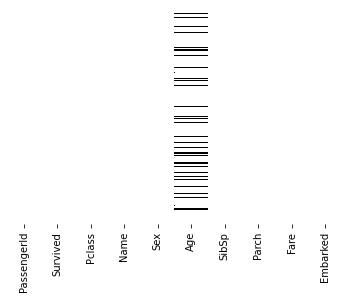

In [13]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='binary')

<AxesSubplot:xlabel='Survived', ylabel='count'>

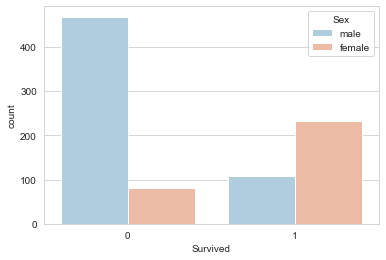

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

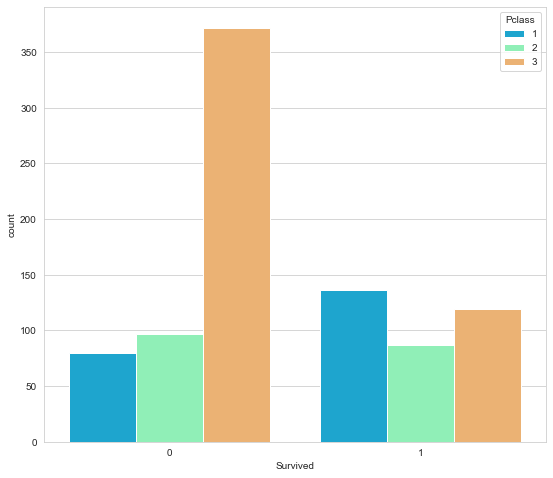

In [90]:
plt.figure(figsize=(9,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train_df, palette='rainbow')

C:\Users\dangnhh-ttcs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

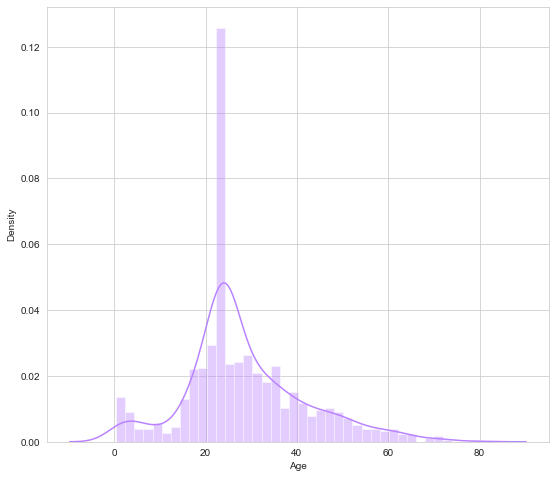

In [89]:
plt.figure(figsize=(9,8))
sns.distplot(train_df['Age'].dropna(),kde=True, color='#B983FF', bins=40)

(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <BarContainer object of 40 artists>)

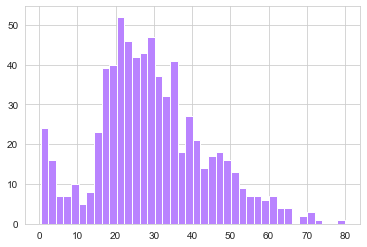

In [28]:
plt.hist(train_df['Age'].dropna(), bins=40,color='#B983FF')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

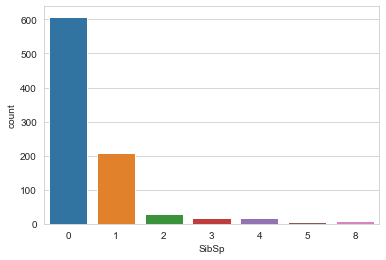

In [30]:
sns.countplot(x='SibSp',data=train_df)

<AxesSubplot:xlabel='Fare'>

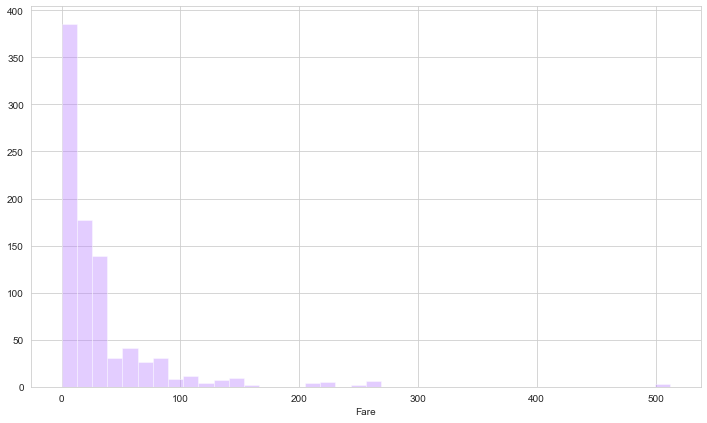

In [44]:
plt.figure(figsize=(12,7))
sns.distplot(train_df['Fare'].dropna(),kde=False, color='#B983FF', bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

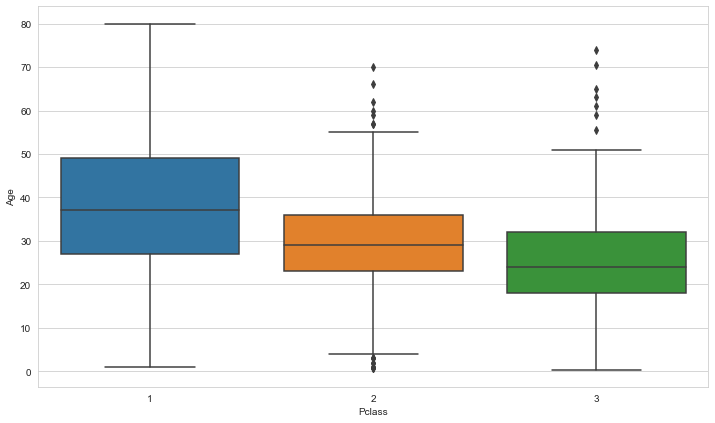

In [45]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train_df)

In [46]:
def missing_age(col):
    Age=col[0]
    Pclass= [1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37        
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else: 
        return Age

In [53]:
train_df['Age'] = train_df[['Age','Pclass']].apply(missing_age, axis=1)

<AxesSubplot:>

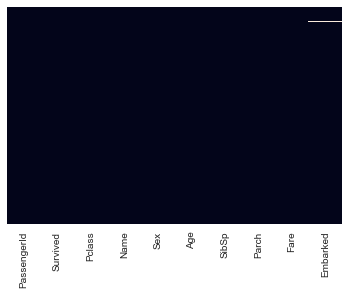

In [58]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [60]:
train_df_num=train_df[['Age', 'SibSp','Parch', 'Fare']]
train_df_cat=train_df[['Survived', 'Pclass','Sex', 'Embarked']]

In [ ]:
plt.figure(figsize=(12,8))

for i in train_df_num:
    sns.distplot(train_df_num[i].dropna(), kde=False)
    plt.show()
    
    plt.figure(figsize=(12,8))

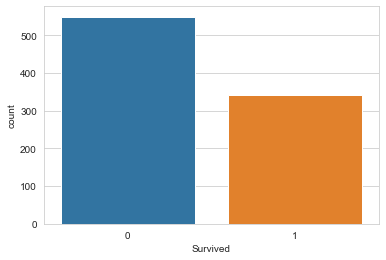

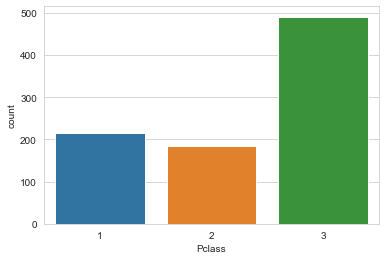

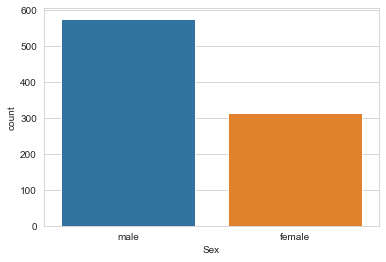

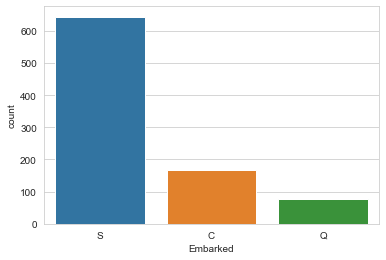

In [93]:
for i in train_df_cat:
    sns.countplot(train_df_cat[i].dropna())
    plt.show()

In [1]:
import numpy as np

def calculate(liste):

    if not len(liste)==9:
        raise ValueError("List must contain nine numbers.")
    
    flat = np.array(liste)
    mat = flat.reshape((3,3))
#     calculations = dict()
    
    values = ['mean', 'variance', 'standard deviation', 'max', 'min', 'sum']
    
    def column_calculate(value):
        return [list(np.value(mat, axis=0)), list(np.value(mat, axis=1)), np.value(flat)]
    
    value_calculated = [column_calculate(n) for n in values]

#     calculations['mean'] = [list(np.mean(mat, axis=0)), list(np.mean(mat, axis=1)), np.mean(flat)]

#     calculations['variance'] = [list(np.var(mat, axis=0)), list(np.var(mat, axis=1)), np.var(flat)]

#     calculations['standard deviation'] = [list(np.std(mat, axis=0)), list(np.std(mat, axis=1)), np.std(flat)]

#     calculations['max'] = [list(np.max(mat, axis=0)), list(np.max(mat, axis=1)), np.max(flat)]

#     calculations['min'] = [list(np.min(mat, axis=0)), list(np.min(mat, axis=1)), np.min(flat)]
    
#     calculations['sum'] = [list(np.sum(mat, axis=0)), list(np.sum(mat, axis=1)), np.sum(flat)]

    return dict((zip(values, value_calculated)))